# Разведочный анализ данных: Data Cleaning. Практическая работа

## Цели практической работы
* Потренироваться выявлять и заполнять пропущенные значения в данных.
* Потренироваться преобразовывать типы данных.
* Потренироваться выявлять и обрабатывать аномальные значения в данных.
* Подготовить датафрейм к этапу генерации признаков.



## Задача

В этой практической работе вы продолжите исследовать и готовить данные для этапа моделирования: заполнять пропущенные значения в некоторых переменных, изменять типы данных и обрабатывать выбросы.

Напомним, что вы работаете с небольшой выборкой из коллекции подержанных автомобилей, выставленных на продажу в Соединённых Штатах. На этих данных вы построите первую модель классификации, определяющую категорию цены подержанного автомобиля в зависимости от характеристик транспортного средства.

## Описание датасета:
- `id`: идентификатор записи;
- `url`: URL записи о продаже;
- `region`: регион;
- `region_url`: URL региона;
- `price`: стоимость;
- `year`: год выпуска;
- `manufacturer`: производитель;
- `model`: модель;
- `condition`: состояние;
- `cylinders`: количество цилиндров;
- `fuel`: тип топлива;
- `odometer`: количество пройденных миль;
- `title_status`: статус;
- `transmission`: коробка передач;
- `VIN`: идентификационный номер;
- `drive`: тип привода;
- `size`: размер;
- `type`: кузов;
- `paint_color`: цвет;
- `image_url`: URL изображения;
- `description`: указанное описание;
- `county`: страна;
- `state`: штат;
- `lat`: широта;
- `long`: долгота;
- `posting_date`: дата размещения объявления о продаже;
- `price_category`: категория цены.


## Что входит в практическую работу
1. Загрузить датасет и ознакомиться с ним.
2. Исследовать переменные датасета на наличие пропусков.
3. Обработать пропуски в зависимости от типа переменной.
4. Изменить типы данных.
5. Исследовать данные на аномальные значения и скорректировать выбросы.

## Что оценивается
- Программа выдаёт верный ответ на заданном наборе данных.
- Описаны причины выбранного решения, если требуется.
- Код читабелен: переменным даны осмысленные названия, отступы и правила расстановки пробелов соблюдены.
- Репозиторий проекта содержит осмысленные коммиты с конкретными реализованными фичами, ветки названы согласно назначению, лишние файлы не хранятся в репозитории.
- В репозитории проекта соблюдена иерархия директорий согласно списку модулей и содержащихся в них видеоматериалов.
- Репозиторий проекта содержит файлы с данными, полученными в результате выполнения практической работы.




## Как отправить работу на проверку
Сдайте практическую работу этого модуля через систему контроля версий Git сервиса Skillbox GitLab. После загрузки работы на проверку напишите об этом в личном кабинете своему куратору.

## Обязательные задачи

In [1]:
# Импортируйте необходимые библиотеки
import pandas as pd
import missingno as msno

### Задача 1. Загрузка датасета и ознакомление с количеством пропущенных значений

1. Загрузите датасет из `data/df_out.csv` и выведите первые пять записей.



In [2]:
# Ваш код здесь
df_out = pd.read_csv('data/df_out.csv')
df_out = pd.DataFrame(df_out)
df_out.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


2. Выведите информацию о датафрейме и обратите внимание на оставшиеся незаполненные значения.


In [4]:
# Ваш код здесь
df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9902 entries, 0 to 9901
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              9902 non-null   int64  
 1   url             9902 non-null   object 
 2   region          9902 non-null   object 
 3   region_url      9902 non-null   object 
 4   price           9902 non-null   int64  
 5   year            9868 non-null   float64
 6   manufacturer    9902 non-null   object 
 7   model           9776 non-null   object 
 8   fuel            9841 non-null   object 
 9   odometer        9902 non-null   int64  
 10  title_status    9738 non-null   object 
 11  transmission    9902 non-null   object 
 12  image_url       9902 non-null   object 
 13  description     9902 non-null   object 
 14  state           9902 non-null   object 
 15  lat             9902 non-null   float64
 16  long            9902 non-null   float64
 17  posting_date    9902 non-null   o

3. Выведите количество полностью заполненных объектов и их процент из всей выборки. Воспользуйтесь материалами из видео.


<Axes: >

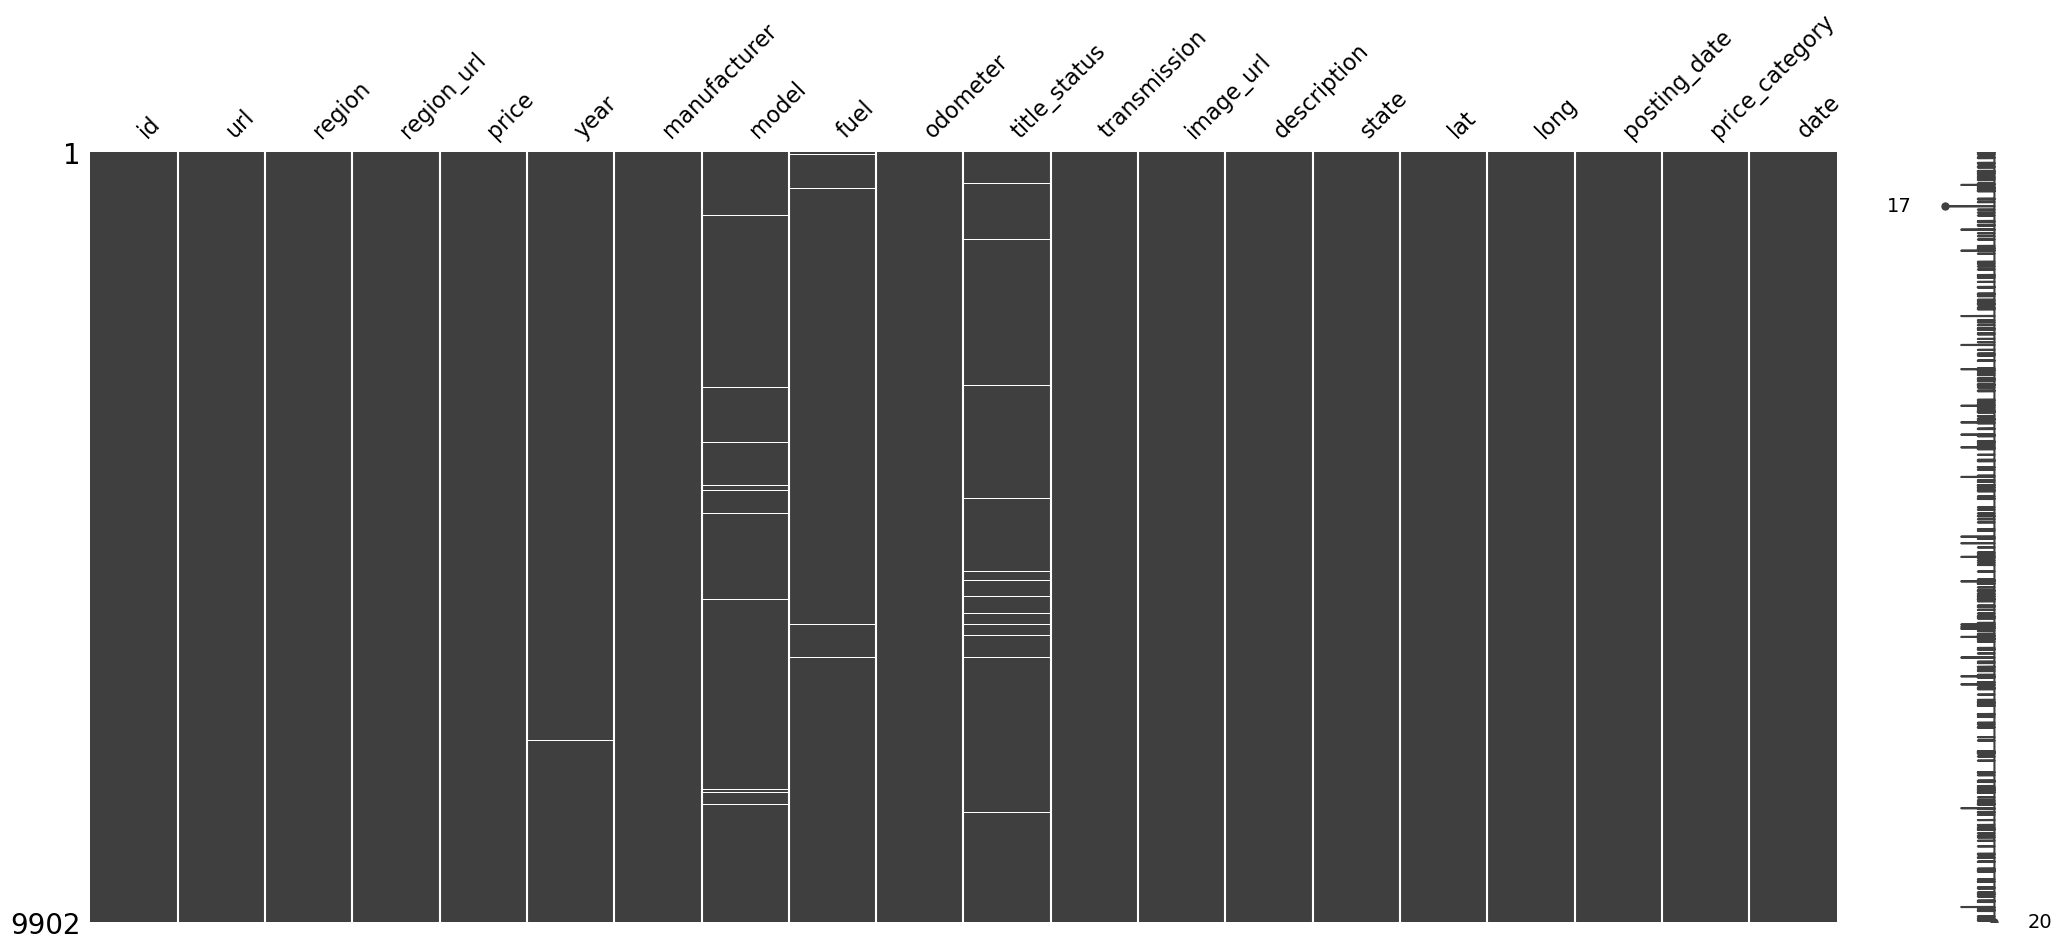

In [5]:
# Ваш код здесь
msno.matrix(df_out)

In [6]:
((df_out.isna().sum() / len(df_out)) * 100).sort_values()

id                0.000000
posting_date      0.000000
long              0.000000
lat               0.000000
state             0.000000
description       0.000000
image_url         0.000000
transmission      0.000000
price_category    0.000000
odometer          0.000000
manufacturer      0.000000
price             0.000000
region_url        0.000000
region            0.000000
url               0.000000
date              0.000000
year              0.343365
fuel              0.616037
model             1.272470
title_status      1.656231
dtype: float64

4. Сохраните в переменную и выведите процент пропущенных значений для каждого признака, отсортируйте признаки по убыванию процента пропущенных значений. Воспользуйтесь материалами из видео и не забудьте передать верный параметр сортировки.


In [7]:
# Ваш код здесь
missing_values = ((df_out.isna().sum() / len(df_out)) * 100).sort_values()
missing_values

id                0.000000
posting_date      0.000000
long              0.000000
lat               0.000000
state             0.000000
description       0.000000
image_url         0.000000
transmission      0.000000
price_category    0.000000
odometer          0.000000
manufacturer      0.000000
price             0.000000
region_url        0.000000
region            0.000000
url               0.000000
date              0.000000
year              0.343365
fuel              0.616037
model             1.272470
title_status      1.656231
dtype: float64

5. Выведите список всех признаков, в которых имеются пропущенные значения. Воспользуйтесь результатом вывода предыдущего задания, чтобы отсортировать признаки, подходящие под условие.

In [8]:
# Ваш код здесь
filtered_features = missing_values[missing_values > 0].index
filtered_features

Index(['year', 'fuel', 'model', 'title_status'], dtype='object')

### Задача 2. Обработка пропусков в годе выпуска автомобиля

1. Выведите количество значений для года выпуска автомобиля, включая пропущенные значения.


In [9]:
# Ваш код здесь
df_out['year'].value_counts(dropna=False)

year
2017.0    808
2018.0    799
2016.0    733
2013.0    685
2015.0    664
         ... 
1927.0      1
1958.0      1
1941.0      1
1935.0      1
1954.0      1
Name: count, Length: 90, dtype: int64

2. Выведите количество пропущенных значений в годе выпуска автомобиля.



In [10]:
# Ваш код здесь
df_out['year'].isna().sum()

34

3. Выведите описательные статистики для года выпуска автомобиля.


In [11]:
# Ваш код здесь
df_out['year'].describe()

count    9868.000000
mean     2010.909708
std         9.705988
min      1915.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2022.000000
Name: year, dtype: float64

4. Выведите записи, в которых год выпуска автомобиля не заполнен. Посмотрите на данные и подумайте, какую стратегию обработки значений можно применить.


ЛИЧНОЕ МНЕНИЕ:
В рекламных описаниях большинства моделей указаны годы выпуска этих моделей, а где не указано можно было бы посмотреть в каких годах выпускались эти модели. И все остальные модели без указанных годов выпуска и которые не смогли найти мы сами можно было бы привести к среднему значению года по категорию ценю

In [12]:
# Ваш код здесь
df_out[df_out['year'].isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
342,7304102133,https://wenatchee.craigslist.org/ctd/d/wenatch...,wenatchee,https://wenatchee.craigslist.org,35880,NaN,other,500,gas,13508,clean,automatic,https://images.craigslist.org/00J0J_6IMoEUzIIM...,2019 *Ram* *1500* Big Horn/Lone Star 4x2 Quad ...,wa,47.434493,-120.320759,2021-04-09T06:31:03-0700,high,2021-04-09 13:31:03+00:00
418,7316337069,https://lasvegas.craigslist.org/ctd/d/scottsda...,las vegas,https://lasvegas.craigslist.org,84995,NaN,other,Super Duty F-350 SRW,diesel,1268,clean,automatic,https://images.craigslist.org/00x0x_iQCC0Ef28S...,2020 *Ford* *Super Duty F-350 SRW* 1K MILES. B...,nv,33.458277,-111.925970,2021-05-03T11:31:39-0700,high,2021-05-03 18:31:39+00:00
423,7315662117,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,43900,NaN,other,Grand Caravan,NaN,21,clean,automatic,https://images.craigslist.org/00f0f_7AwipNocNH...,"2019 *Dodge* *Grand Caravan* SE - $43,900Call ...",co,39.674406,-104.998604,2021-05-02T01:11:33-0600,high,2021-05-02 07:11:33+00:00
697,7316199009,https://nashville.craigslist.org/ctd/d/nashvil...,nashville,https://nashville.craigslist.org,28498,NaN,other,olet Silverado 1500,NaN,59246,NaN,automatic,https://images.craigslist.org/00T0T_dZ7nOXskCS...,2019 *Chevrolet* *Silverado 1500* 2019 CHEVROL...,tn,36.138022,-86.732261,2021-05-03T10:00:40-0500,high,2021-05-03 15:00:40+00:00
887,7316840794,https://denver.craigslist.org/ctd/d/american-f...,denver,https://denver.craigslist.org,60900,NaN,other,F-150,gas,6110,clean,automatic,https://images.craigslist.org/01616_bpzSdSRTbx...,"2020 *Ford* *F-150* PLATINUM FX4 Truck - $60,9...",co,40.362248,-111.785947,2021-05-04T12:11:22-0600,high,2021-05-04 18:11:22+00:00
900,7311915616,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,67900,NaN,other,Odyssey,gas,21,clean,automatic,https://images.craigslist.org/00404_erlbeKWEkn...,2020 *Honda* *Odyssey* EX-L w/Navi/RES Automat...,co,39.674406,-104.998604,2021-04-24T10:41:06-0600,high,2021-04-24 16:41:06+00:00
998,7306735187,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,38900,NaN,other,Grand Caravan,NaN,21,clean,automatic,https://images.craigslist.org/00F0F_3T6FM0XMZW...,"2019 *Dodge* *Grand Caravan* SE - $38,900Call ...",co,39.674406,-104.998604,2021-04-14T10:51:36-0600,high,2021-04-14 16:51:36+00:00
1208,7309954650,https://gainesville.craigslist.org/ctd/d/gaine...,gainesville,https://gainesville.craigslist.org,24975,NaN,other,CR-V,gas,44128,clean,automatic,https://images.craigslist.org/00000_2TUtAgLlCR...,"2019 *Honda* *CR-V* EX 2WD SUV - $24,975Call o...",fl,29.676827,-82.319202,2021-04-20T14:46:55-0400,high,2021-04-20 18:46:55+00:00
1308,7313865045,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,47900,NaN,other,a Sienna,gas,43701,clean,automatic,https://images.craigslist.org/00o0o_8XYp4Zygdj...,2018 *Toyota* *Sienna* LE Automatic Access Sea...,co,39.674406,-104.998604,2021-04-28T10:12:14-0600,high,2021-04-28 16:12:14+00:00
1828,7303344554,https://daytona.craigslist.org/ctd/d/new-smyrn...,daytona beach,https://daytona.craigslist.org,35850,NaN,other,Transit Cargo Van,gas,567,clean,automatic,https://images.craigslist.org/00a0a_d4XVrHnlxl...,"2020 *Ford* *Transit Cargo Van* T-250 148"" WB*...",fl,29.046240,-80.934561,2021-04-07T17:10:06-0400,high,2021-04-07 21:10:06+00:00


5. Обработайте пропуски, удалив записи, в которых год выпуска автомобиля не заполнен, и сохраните обновлённый датафрейм, а затем выведите его размерность.


In [13]:
# Ваш код здесь
df_out_clean = df_out.dropna(subset=['year'])
df_out_clean.shape

(9868, 20)

6. Выведите количество пропущенных значений в годе выпуска автомобиля для обновлённого датафрейма.

In [14]:
print("Количество пропущенных значений в year:", df_out_clean['year'].isna().sum())  # Допишите код

Количество пропущенных значений в year: 0


### Задача 3. Обработка пропусков в типе топлива

1. Выведите количество значений для типа топлива, включая пропущенные значения. Обратите внимание на количество пропущенных значений.




In [15]:
# Ваш код здесь
df_out_clean['fuel'].value_counts(dropna=False)

fuel
gas         8298
other        725
diesel       643
hybrid       104
NaN           54
electric      44
Name: count, dtype: int64

2. Выведите описательные статистики для типа топлива.


In [16]:
# Ваш код здесь
df_out_clean['fuel'].describe()

count     9814
unique       5
top        gas
freq      8298
Name: fuel, dtype: object

3. Выведите записи, в которых тип топлива не заполнен. Посмотрите на данные и подумайте, какую стратегию обработки значений можно применить.


ЛИЧНОЕ МНЕНИЕ: Думаю можно было бы найти такие же модели машин и присвоить такое же значение вида топлива как у аналогичной модели

In [17]:
# Ваш код здесь
df_out_clean[df_out_clean['fuel'].isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
32,7309910590,https://eugene.craigslist.org/ctd/d/eugene-200...,eugene,https://eugene.craigslist.org,4977,2001.0,toyota,camry solara 2dr cpe se v6 auto (natl),NaN,193242,clean,automatic,https://images.craigslist.org/00F0F_ebtJlxCQjv...,***Call Us for more information at: 541-228-94...,or,44.076513,-123.150156,2021-04-20T10:40:15-0700,low,2021-04-20 17:40:15+00:00
78,7314559074,https://eugene.craigslist.org/ctd/d/eugene-200...,eugene,https://eugene.craigslist.org,27977,2009.0,ford,"f-150 4wd supercrew 145"" platinum",NaN,79522,clean,automatic,https://images.craigslist.org/00L0L_khoMmqXaSJ...,***Call Us for more information at: 541-228-94...,or,44.076513,-123.150156,2021-04-29T15:15:30-0700,high,2021-04-29 22:15:30+00:00
273,7315141987,https://honolulu.craigslist.org/oah/ctd/d/fort...,hawaii,https://honolulu.craigslist.org,29888,2019.0,nissan,frontier crew cab 4x2 sv auto,NaN,10679,clean,automatic,https://images.craigslist.org/00F0F_d9wEXQuSyu...,***Call Us for more information at: 877-262-34...,hi,21.344376,-157.896975,2021-04-30T15:50:19-1000,high,2021-05-01 01:50:19+00:00
469,7316807613,https://eugene.craigslist.org/ctd/d/eugene-200...,eugene,https://eugene.craigslist.org,13436,2006.0,chevrolet,"silverado 1500 ext cab 143.5"" wb 4wd ls",NaN,172700,clean,automatic,https://images.craigslist.org/00l0l_35tV0gQdD8...,***Call Us for more information at: 541-228-94...,or,44.076513,-123.150156,2021-05-04T10:20:19-0700,medium,2021-05-04 17:20:19+00:00
1002,7314561306,https://cnj.craigslist.org/ctd/d/parlin-2000-c...,central NJ,https://cnj.craigslist.org,5894,2000.0,chevrolet,"s-10 ext cab 123"" wb ls",NaN,78740,clean,automatic,https://images.craigslist.org/00O0O_8vd70bT1rY...,***Call Us for more information at: 732-316-55...,nj,40.468650,-74.296990,2021-04-29T18:20:19-0400,low,2021-04-29 22:20:19+00:00
1269,7310297136,https://westernmass.craigslist.org/ctd/d/johns...,western massachusetts,https://westernmass.craigslist.org,6000,2008.0,other,IC IC,NaN,0,NaN,automatic,https://images.craigslist.org/00404_cBFpBKbfr2...,"2008 *IC* *IC* CE300 - $6,000Call Us Today! 85...",ma,43.008105,-74.352011,2021-04-21T10:11:05-0400,low,2021-04-21 14:11:05+00:00
1307,7310414739,https://nwct.craigslist.org/ctd/d/melville-200...,northwest CT,https://nwct.craigslist.org,11995,2007.0,gmc,c-7500 multiple uses perfect,NaN,50098,clean,automatic,https://images.craigslist.org/00T0T_jvsOAKSGAr...,2007 *GMC* *C-7500 MULTIPLE USES PERFECT* FOR ...,ct,40.681179,-73.430488,2021-04-21T13:18:41-0400,medium,2021-04-21 17:18:41+00:00
1670,7316342709,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,19942,2017.0,ram,"promaster cargo van 1500 low roof 118"" wb",NaN,88836,clean,automatic,https://images.craigslist.org/00707_6ZlIIpYmGf...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T14:40:24-0400,medium,2021-05-03 18:40:24+00:00
1830,7315151536,https://honolulu.craigslist.org/oah/ctd/d/fort...,hawaii,https://honolulu.craigslist.org,29988,2019.0,toyota,sienna le fwd 8-passenger (natl),NaN,18762,clean,automatic,https://images.craigslist.org/00R0R_dO0gtiRwLa...,***Call Us for more information at: 877-262-34...,hi,21.344376,-157.896975,2021-04-30T16:25:22-1000,high,2021-05-01 02:25:22+00:00


4. Обработайте пропуски, заполнив незаполненные значения типа топлива значением `other`, и сохраните изменения. Обратите внимание, что мы заполняем пропуски не самым популярным значением в выборке.


In [18]:
# Ваш код здесь
df_out_clean.loc[:, 'fuel'] = df_out_clean['fuel'].fillna('other')

5. Выведите для обновлённого датафрейма количество пропущенных значений для типа топлива.

In [19]:
print("Количество пропущенных значений в fuel:", df_out_clean['fuel'].isna().sum())  # Допишите код

Количество пропущенных значений в fuel: 0


### Задача 4. Обработка пропусков в модели автомобиля

1. Выведите количество значений для модели автомобиля, включая пропущенные значения. Обратите внимание на количество пропущенных значений.



In [20]:
# Ваш код здесь
df_out_clean['model'].value_counts(dropna=False)

model
f-150                        148
NaN                          126
silverado 1500               106
1500                         100
camry                         76
                            ... 
sorrento lx v6                 1
sierra1500 crewcab 4x4         1
corolla se                     1
xc60 t6 inscription sport      1
a3 2.0t premium plus pzev      1
Name: count, Length: 3438, dtype: int64

2. Выведите описательные статистики для модели автомобиля.


In [21]:
# Ваш код здесь
df_out_clean['model'].describe()

count      9742
unique     3437
top       f-150
freq        148
Name: model, dtype: object

3. Выведите записи, в которых модель автомобиля не заполнена. Посмотрите на данные и подумайте, какую стратегию обработки значений можно применить.


ЛИЧНОЕ МНЕНИЕ: Возможно можно было бы найти большинство модели из описании рекламных баннеров, а те модели что там не указаны можно было бы найти через произвадителя и моделей машин в этом ценовом сегменте

In [23]:
# Ваш код здесь
df_out_clean[df_out_clean['model'].isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
67,7316913641,https://ventura.craigslist.org/cto/d/camarillo...,ventura county,https://ventura.craigslist.org,3000,2005.0,rover,NaN,gas,165206,clean,automatic,https://images.craigslist.org/00S0S_b3yx6L4N2S...,2005 Range Rover HSE Changed Oil and now engi...,ca,34.219565,-119.001986,2021-05-04T13:11:15-0700,low,2021-05-04 20:11:15+00:00
140,7316550853,https://chicago.craigslist.org/chc/cto/d/midlo...,chicago,https://chicago.craigslist.org,3000,2006.0,jeep,NaN,gas,132000,clean,automatic,https://images.craigslist.org/01111_kNv3EKjH4H...,SUPER CLEAN 2006 JEEP LIBEERY RANAGADE 4X4 O...,il,41.618957,-87.726334,2021-05-03T20:33:40-0500,low,2021-05-04 01:33:40+00:00
149,7303575863,https://worcester.craigslist.org/ctd/d/fitchbu...,worcester / central MA,https://worcester.craigslist.org,7800,2007.0,gmc,NaN,gas,190000,clean,automatic,https://images.craigslist.org/00f0f_iWjiToqea2...,2007 gmc with plow leather loaded nice truck r...,ma,42.579600,-71.803100,2021-04-08T09:10:07-0400,low,2021-04-08 13:10:07+00:00
198,7315267860,https://gainesville.craigslist.org/ctd/d/kissi...,gainesville,https://gainesville.craigslist.org,19200,2012.0,ram,NaN,gas,121371,clean,automatic,https://images.craigslist.org/00W0W_hHV4D0Po0G...,2012 RAM 1500 Laramie Crew Cab 2WD Offered...,fl,28.329026,-81.404237,2021-05-01T10:05:17-0400,medium,2021-05-01 14:05:17+00:00
249,7316024407,https://reading.craigslist.org/ctd/d/paterson-...,reading,https://reading.craigslist.org,18695,2007.0,ram,NaN,diesel,220019,clean,automatic,https://images.craigslist.org/00n0n_jgq4eOvH7I...,2007 Dodge Ram 2500 SLT 4x4 Quad Cab Cummins D...,pa,40.894535,-74.152367,2021-05-02T21:06:09-0400,medium,2021-05-03 01:06:09+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9469,7314341390,https://desmoines.craigslist.org/cto/d/urbanda...,des moines,https://desmoines.craigslist.org,8000,2007.0,toyota,NaN,gas,85285,clean,automatic,https://images.craigslist.org/00K0K_aMoJgOIueB...,Toyota has been owned by non smoker with no pe...,ia,41.629500,-93.723000,2021-04-29T10:50:54-0500,low,2021-04-29 15:50:54+00:00
9521,7304358131,https://vermont.craigslist.org/ctd/d/salem-201...,vermont,https://vermont.craigslist.org,19944,2012.0,ram,NaN,gas,73082,clean,automatic,https://images.craigslist.org/00A0A_bfCaGJ20IX...,2012 RAM 1500 4WD REGULAR CAB SHORT BED 5.7 HE...,vt,42.788204,-71.233728,2021-04-09T16:24:23-0400,medium,2021-04-09 20:24:23+00:00
9573,7309686008,https://louisville.craigslist.org/cto/d/radcli...,louisville,https://louisville.craigslist.org,1600,2005.0,gmc,NaN,gas,52536,clean,automatic,https://images.craigslist.org/01111_99unV6cYER...,GMC Savana PRO AWD cargo van has been driven l...,ky,37.858900,-86.006900,2021-04-20T04:48:30-0400,low,2021-04-20 08:48:30+00:00
9828,7316447901,https://tulsa.craigslist.org/cto/d/tulsa-2017-...,tulsa,https://tulsa.craigslist.org,65000,2017.0,rover,NaN,gas,47000,clean,automatic,https://images.craigslist.org/00s0s_iGpmplDL99...,"2017 Range Rover HSE, supercharged V8, silver ...",ok,36.126200,-95.940800,2021-05-03T16:37:36-0500,high,2021-05-03 21:37:36+00:00


4. Если подробнее изучить значения описания автомобиля, то, возможно, модель автомобиля получится восстановить из описания. Сейчас обработайте пропуски, заполнив незаполненные значения модели автомобиля значением `other`, и сохраните изменения. Обратите внимание, что мы в очередной раз заполняем пропуски не самым популярным значением в выборке.


In [24]:
# Ваш код здесь
df_out_clean.loc[:, 'model'] = df_out_clean['model'].fillna('other')

5. Выведите для обновлённого датафрейма количество пропущенных значений для модели автомобиля.

In [25]:
print("Количество пропущенных значений в model:", df_out_clean['model'].isna().sum())  # Допишите код

Количество пропущенных значений в model: 0


### Задача 5. Обработка пропусков в статусе автомобиля

1. Выведите количество значений для статуса автомобиля, включая пропущенные значения. Обратите внимание на количество пропущенных значений.


In [26]:
# Ваш код здесь
df_out_clean['title_status'].value_counts(dropna=False)

title_status
clean         9397
rebuilt        168
NaN            159
salvage         91
lien            35
missing         16
parts only       2
Name: count, dtype: int64

2. Выведите описательные статистики для модели автомобиля.



In [27]:
# Ваш код здесь
df_out_clean['title_status'].describe()

count      9709
unique        6
top       clean
freq       9397
Name: title_status, dtype: object

3. Выведите записи, в которых статус автомобиля не заполнен. Посмотрите на данные и подумайте, какую стратегию обработки значений можно применить.


ЛИЧНОЕ МНЕНИЕ: Так как статус нельзя отследить никак в этом датафрейме, то я считаю что значение Clean с 96,8% от всех значении можно использовать и на остальные незаполненные строки

In [28]:
# Ваш код здесь
df_out_clean[df_out_clean['title_status'].isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
11,7316540706,https://cincinnati.craigslist.org/ctd/d/fairfi...,cincinnati,https://cincinnati.craigslist.org,4995,2012.0,fiat,500 pop,gas,59242,NaN,manual,https://images.craigslist.org/00Z0Z_jbUmVcYlwR...,"2012 Fiat 500 Pop FOR ONLY $102/mo!59,242 mi. ...",oh,39.297045,-84.563243,2021-05-03T21:03:32-0400,low,2021-05-04 01:03:32+00:00
185,7313570594,https://orangecounty.craigslist.org/ctd/d/coro...,orange county,https://orangecounty.craigslist.org,17900,2013.0,ram,1500 tradesman quad cab,gas,145499,NaN,automatic,https://images.craigslist.org/00H0H_1JFMPCYyW8...,2013 Ram 1500 Tradesman Quad Cab PRICED TO SEL...,ca,33.873436,-117.542806,2021-04-27T15:03:47-0700,medium,2021-04-27 22:03:47+00:00
243,7315211652,https://ocala.craigslist.org/ctd/d/riverview-2...,ocala,https://ocala.craigslist.org,40990,2019.0,toyota,sienna xle,gas,3700,NaN,automatic,https://images.craigslist.org/01111_grKNF8GrXz...,2019 Toyota Sienna - Wheelchair Accessible Han...,fl,27.849760,-82.364950,2021-05-01T06:35:56-0400,high,2021-05-01 10:35:56+00:00
284,7306702976,https://toledo.craigslist.org/ctd/d/chelsea-73...,toledo,https://toledo.craigslist.org,4592,2003.0,chevrolet,avalanche 1500,gas,268691,NaN,automatic,https://images.craigslist.org/00808_1IOMJuA4GL...,$73/mo - 2003 Chevrolet Avalanche 1500 BaseCre...,oh,42.300673,-84.024108,2021-04-14T12:03:01-0400,low,2021-04-14 16:03:01+00:00
310,7307609203,https://roseburg.craigslist.org/ctd/d/eugene-2...,roseburg,https://roseburg.craigslist.org,18450,2017.0,ford,mustang,gas,66049,NaN,automatic,https://images.craigslist.org/00505_4apF36sLbP...,"2017 Ford MUSTANG - $18,450 \tMayberry Motors ...",or,44.058499,-123.106176,2021-04-16T04:06:29-0700,medium,2021-04-16 11:06:29+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,7301707830,https://tricities.craigslist.org/ctd/d/bristol...,tri-cities,https://tricities.craigslist.org,8995,2013.0,honda,odyssey,gas,203112,NaN,automatic,https://images.craigslist.org/00u0u_bawW7HN8xW...,"2013 *Honda* *Odyssey* 5dr EX Van FWD - $8,995...",tn,36.541821,-82.234645,2021-04-04T13:12:27-0400,low,2021-04-04 17:12:27+00:00
9708,7313949726,https://harrisburg.craigslist.org/ctd/d/brockp...,harrisburg,https://harrisburg.craigslist.org,8900,2012.0,honda,accord,other,95674,NaN,other,https://images.craigslist.org/01212_dsfYRNhxfd...,Car Starz Call Sales at 717-401-4221 2012 Hond...,pa,41.261540,-78.704520,2021-04-28T14:25:32-0400,low,2021-04-28 18:25:32+00:00
9743,7314987181,https://nashville.craigslist.org/ctd/d/nashvil...,nashville,https://nashville.craigslist.org,20900,2014.0,lexus,rx 350,gas,70800,NaN,automatic,https://images.craigslist.org/00Q0Q_cGablAkoYV...,2014 *Lexus* *RX 350* 2014 LEXUS RX 350 SUV 1-...,tn,36.138022,-86.732261,2021-04-30T15:00:48-0500,medium,2021-04-30 20:00:48+00:00
9759,7309717260,https://savannah.craigslist.org/ctd/d/jacksonv...,savannah / hinesville,https://savannah.craigslist.org,11495,2006.0,lexus,gx 470,gas,242000,NaN,automatic,https://images.craigslist.org/00s0s_8xg4gw6aAg...,"2006 *Lexus* *GX 470* 4dr SUV 4WD - $11,495By ...",ga,30.513566,-81.621875,2021-04-20T08:01:49-0400,medium,2021-04-20 12:01:49+00:00


4. Обработайте пропуски, заполнив незаполненные значения статуса автомобиля самым популярным значением, и сохраните изменения. Самое популярное значение передайте не в виде строки, а получите моду.


In [31]:
# Ваш код здесь
df_out_clean.loc[:, 'title_status'] = df_out_clean['title_status'].fillna('clean')

5. Выведите для обновлённого датафрейма количество пропущенных значений для статуса автомобиля.


In [32]:
print("Количество пропущенных значений в title_status:", df_out_clean['title_status'].isna().sum())  # Допишите код

Количество пропущенных значений в title_status: 0


6. Ещё раз выведите количество полностью заполненных объектов и их процент из всей выборки. После обработки всех пропусков можно переходить к следующему этапу.

In [33]:
# Ваш код здесь
((df_out_clean.isna().sum() / len(df_out_clean)) * 100).sort_values()

id                0.0
posting_date      0.0
long              0.0
lat               0.0
state             0.0
description       0.0
image_url         0.0
transmission      0.0
title_status      0.0
odometer          0.0
fuel              0.0
model             0.0
manufacturer      0.0
year              0.0
price             0.0
region_url        0.0
region            0.0
url               0.0
price_category    0.0
date              0.0
dtype: float64

### Задача 6. Преобразование типа данных в годе выпуска автомобиля
1.  Выведите информацию о датафрейме и обратите внимание на типы данных.


In [34]:
# Ваш код здесь
df_out_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9868 entries, 0 to 9901
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              9868 non-null   int64  
 1   url             9868 non-null   object 
 2   region          9868 non-null   object 
 3   region_url      9868 non-null   object 
 4   price           9868 non-null   int64  
 5   year            9868 non-null   float64
 6   manufacturer    9868 non-null   object 
 7   model           9868 non-null   object 
 8   fuel            9868 non-null   object 
 9   odometer        9868 non-null   int64  
 10  title_status    9868 non-null   object 
 11  transmission    9868 non-null   object 
 12  image_url       9868 non-null   object 
 13  description     9868 non-null   object 
 14  state           9868 non-null   object 
 15  lat             9868 non-null   float64
 16  long            9868 non-null   float64
 17  posting_date    9868 non-null   object

2. Выведите описательные статистики для года выпуска автомобиля. Обратите внимание на тип данных.



In [36]:
# Ваш код здесь
df_out_clean['year'].describe()

count    9868.000000
mean     2010.909708
std         9.705988
min      1915.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2022.000000
Name: year, dtype: float64

3. Измените тип данных для года выпуска на более подходящий целочисленный тип и выведите получившийся тип данных только для года выпуска.

In [37]:
# Ваш код здесь
df_out_clean.loc[:, 'year'] = df_out_clean['year'].astype(int)

### Задача 7. Преобразование типа данных в категориальных переменных

1. Выведите тип данных для типа топлива автомобиля.


In [38]:
# Ваш код здесь
df_out_clean['fuel'].dtype

dtype('O')

2. Категориальным переменным можно задавать специальный тип данных `category`. Подробнее об этом можно прочитать в [документации](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html). Укажите для типа топлива тип данных `category`, сохраните изменения в переменную `series` и выведите её.


In [39]:
# Ваш код здесь
series = df_out_clean['fuel'].astype("category")
series

0       diesel
1        other
2          gas
3          gas
4          gas
         ...  
9897       gas
9898       gas
9899       gas
9900    hybrid
9901       gas
Name: fuel, Length: 9868, dtype: category
Categories (5, object): ['diesel', 'electric', 'gas', 'hybrid', 'other']

3. Выведите тип данных для серии. Обратите внимание на структуру вывода.

In [41]:
# Ваш код здесь
series.dtype

CategoricalDtype(categories=['diesel', 'electric', 'gas', 'hybrid', 'other'], ordered=False)

4. Выведите первые две категории, используя вывод типа данных выше.

In [42]:
# Ваш код здесь
series[:2]

0    diesel
1     other
Name: fuel, dtype: category
Categories (5, object): ['diesel', 'electric', 'gas', 'hybrid', 'other']

### Задача 8. Выбросы в годе выпуска

1. Выведите описательные статистики для года выпуска автомобиля. Обратите внимание на пограничные значения, на квартили.



In [43]:
# Ваш код здесь
df_out_clean['year'].describe()

count    9868.000000
mean     2010.909708
std         9.705988
min      1915.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2022.000000
Name: year, dtype: float64

2. Выведите границы для нормальных значений года выпуска, используя интерквартильный размах. Воспользуйтесь материалами из видео. Посмотрите, входят ли минимальное и максимальное значения в интервал между полученными границами.


In [44]:
# Ваш код здесь
def calculate_outliers(data):

    q25 = data.quantile(0.25)

    q75 = data.quantile(0.75)

    iqr = q75 - q25

    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)

    return boundaries

In [45]:
boundaries = calculate_outliers(df_out_clean.year)

In [48]:
Q1 = df_out_clean['year'].quantile(0.25)
Q3 = df_out_clean['year'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [51]:
lower_bound

1994.5

In [50]:
upper_bound

2030.5

3. Посчитайте и выведите количество выбросов в годе выпуска автомобиля.


In [52]:
# Ваш код здесь
is_outlier = (df_out_clean.year < boundaries[0]) | (df_out_clean.year > boundaries[1])

is_outlier.sum()

394

4. Посчитайте и выведите долю выбросов в годе выпуска автомобиля.


In [53]:
# Ваш код здесь
is_outlier.sum() / len(df_out_clean)

0.03992703688690717

5. Выведите записи, в которых год выпуска попадает в выбросы. Посмотрите на данные и подумайте, могут ли эти выбросы описывать особые значения категории цены или других признаков или действительно являются выбросами.


In [54]:
# Ваш код здесь
df_out_clean[is_outlier]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
13,7317089086,https://seattle.craigslist.org/see/ctd/d/portl...,seattle-tacoma,https://seattle.craigslist.org,14995,1994.0,ford,e-series van universal by glaval designer luxu...,gas,156925,clean,automatic,https://images.craigslist.org/00r0r_13JUlXZOMl...,"Priced to Sell: $14,9951994 Ford E-Series Van ...",wa,45.391373,-122.613533,2021-05-04T20:22:11-0700,medium,2021-05-05 03:22:11+00:00
21,7312327909,https://madison.craigslist.org/cto/d/madison-1...,madison,https://madison.craigslist.org,89995,1970.0,other,oldsmobile 442,gas,111111,clean,automatic,https://images.craigslist.org/00S0S_agk7Nol4CO...,1970 Oldsmobile 442 Convertible 442 Indy Pace ...,wi,43.098400,-89.273400,2021-04-25T10:10:43-0500,high,2021-04-25 15:10:43+00:00
57,7314413105,https://inlandempire.craigslist.org/ctd/d/cost...,inland empire,https://inlandempire.craigslist.org,69888,1948.0,ford,coe,gas,1,clean,automatic,https://images.craigslist.org/00M0M_8jgBCZZuG6...,Awesome Resto-Mod COE Ford Car Hauler. Equippe...,ca,33.680100,-117.908500,2021-04-29T10:49:29-0700,high,2021-04-29 17:49:29+00:00
66,7310077530,https://hudsonvalley.craigslist.org/cto/d/bloo...,hudson valley,https://hudsonvalley.craigslist.org,5500,1990.0,other,Diahatsu,gas,30000,clean,manual,https://images.craigslist.org/00T0T_a4VRbx40ea...,1991 Daihatsu hijet 5 speed extended cab....im...,ny,41.564400,-74.430400,2021-04-20T18:30:18-0400,low,2021-04-20 22:30:18+00:00
106,7314527175,https://rapidcity.craigslist.org/ctd/d/sherman...,rapid city / west SD,https://rapidcity.craigslist.org,43500,1968.0,chevrolet,camaro,gas,43320,clean,manual,https://images.craigslist.org/00h0h_2N66LMJBAI...,1968 Chevrolet Camaro Convertible. VIN:124678N...,sd,33.637200,-96.618400,2021-04-29T15:11:01-0600,high,2021-04-29 21:11:01+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9789,7313487583,https://springfield.craigslist.org/cto/d/mount...,springfield,https://springfield.craigslist.org,3500,1974.0,jeep,cj5,gas,10000,clean,manual,https://images.craigslist.org/00G0G_cdxzaTaVqa...,1974 Jeep cj5 304 v8 4speed manual trans Da...,mo,36.331200,-92.375300,2021-04-27T14:30:28-0500,low,2021-04-27 19:30:28+00:00
9823,7311566144,https://chico.craigslist.org/cto/d/chico-1994-...,chico,https://chico.craigslist.org,16000,1994.0,ford,f250,gas,32500,clean,automatic,https://images.craigslist.org/01010_343KkgTaHo...,"Up for sale is this 32,000 original mile Ford ...",ca,39.745800,-121.844400,2021-04-23T13:51:20-0700,medium,2021-04-23 20:51:20+00:00
9846,7313676859,https://reno.craigslist.org/ctd/d/sherman-1984...,reno / tahoe,https://reno.craigslist.org,26500,1984.0,chevrolet,silverado,gas,38751,clean,automatic,https://images.craigslist.org/00r0r_czXfi4UeJF...,"1984 Chevrolet C10 Silverado, short wheelbase ...",ca,33.637200,-96.618400,2021-04-27T19:44:27-0700,high,2021-04-28 02:44:27+00:00
9874,7316458200,https://portland.craigslist.org/mlt/cto/d/port...,portland,https://portland.craigslist.org,18500,1972.0,chevrolet,other,gas,75000,clean,automatic,https://images.craigslist.org/00x0x_7FqS8iHJst...,1972 classic Chevrolet pick up custom deluxe ...,or,45.494960,-122.666988,2021-05-03T14:58:34-0700,medium,2021-05-03 21:58:34+00:00


6. Выведите количество значений для категории цены для записей, в которых год выпуска автомобиля является выбросом. Описывают ли аномальные значения года выпуска какое-либо из значений цены автомобиля лучше, чем остальные?


ЛИЧНОЕ МНЕНИЕ: На самом деле я думал что выбросы будут считаться некими винтажными автомобилями, и будут стоить дорого. Но посмотрев очень старые автомобили времени первой мировой я увидел что он в низкой ценовой категории. Я думаю есть другие определяющие факторы кроме года выпуска влияющие на цену более прямо

In [55]:
# Ваш код здесь
df_out_clean.loc[is_outlier, 'price_category'].value_counts()

price_category
low       181
medium    135
high       78
Name: count, dtype: int64

7. Так как выбросы в годе выпуска находятся среди минимальных значений, заполните те значения, которые являются выбросами, значением нижней границы. Не забудьте учесть, что год должен быть целочисленным значением, входящим в границы нормальных значений.


In [56]:
# Ваш код здесь
df_out_clean.loc[df_out_clean['year'] < 2008, 'year'] = 2008
df_out_clean.loc[:, 'year'] = df_out_clean['year'].astype(int)

8. Выведите ещё раз описательные статистики для года выпуска автомобиля, чтобы проверить, что теперь все значения года входят в границы нормальных значений.

In [57]:
# Ваш код здесь
df_out_clean['year'].describe()

count    9868.000000
mean     2013.067694
std         4.119439
min      2008.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2022.000000
Name: year, dtype: float64

## Дополнительные задачи

### Задача 9. Загрузка датафрейма с параметрами преобразования

Некоторые преобразования признаков можно сделать ещё в момент загрузки датафрейма из файла.

1. Прочитайте в новый датафрейм файл `data/vehicles_dataset.csv`, выбрав только нужные колонки и применив приведение типов данных. Обратитесь к [документации](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html), чтобы узнать, за что отвечают параметры `usecols`,  `parse_dates` и `dtype`.


Датафрейм должен содержать:
- колонки `price`, `year`, `posting_date`;
- `posting_date` в datatime-формате;
- `price` в вещественном формате;
- `year` в целочисленном формате.

Возможно, вы столкнётесь с ошибкой при считывании года в виде целого числа. Подробнее о том, как бороться с этой ошибкой, можно узнать в документации по `обнуляемому целочисленному типу данных`:
- https://pandas.pydata.org/pandas-docs/stable/user_guide/integer_na.html

*Подсказка:* Pandas может представлять целочисленные данные с возможными отсутствующими значениями, используя [arrays.IntegerArray](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.arrays.IntegerArray.html#pandas.arrays.IntegerArray) или его псевдонимы, которые вы сможете найти в документации.

In [58]:
# Ваш код здесь
df = pd.read_csv('data/vehicles_dataset.csv', 
                 usecols=['price', 'year', 'posting_date'], 
                 parse_dates=['posting_date'], 
                 dtype={'price': float, 'year': 'Int64'})

2. Выведите информацию о датафрейме, чтобы убедиться, что признаки при загрузке преобразовались верно.


In [59]:
# Ваш код здесь
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10050 entries, 0 to 10049
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         10050 non-null  float64
 1   year          10014 non-null  Int64  
 2   posting_date  10048 non-null  object 
dtypes: Int64(1), float64(1), object(1)
memory usage: 245.5+ KB


3. Для первой записи в датафрейме извлеките из `posting_date` и выведите номер месяца.


In [60]:
# Ваш код здесь
df.loc[0, 'posting_date'].month

4